In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root, minimize

$ x' = x(α_1 - β_1 y) $

$ y' = y(-α_2 + β_2 x) $

In [30]:
START = 0
END = 80
N = 10000
h = (END-START) / N

alpha1 = 1.
alpha2 = 0.5
beta1 = 0.1
beta2 = 0.02

X0 = 20.
Y0 = 20.

## Metoda jawna Eulera

In [31]:
explicit_x = np.empty(N, dtype=np.double)
explicit_y = np.empty(N, dtype=np.double)
explicit_x[0] = X0
explicit_y[0] = Y0

def fx(x, y):
    return x * (alpha1 - beta1 * y)

def fy(x, y):
    return y * (-alpha2 + beta2 * x)

# euler explicit
for i in range(1, N):
    explicit_x[i] = explicit_x[i-1] + h * fx(explicit_x[i-1], explicit_y[i-1])
    explicit_y[i] = explicit_y[i-1] + h * fy(explicit_x[i-1], explicit_y[i-1])

## Metoda niejawna Eulera

In [32]:
implicit_x = np.empty(N, dtype=np.double)
implicit_y = np.empty(N, dtype=np.double)
implicit_x[0] = X0
implicit_y[0] = Y0

def F(variables, x_n, y_n):
    x_next, y_next = variables
    eq1 = x_next - x_n - h * x_next * (alpha1 - beta1 * y_next)
    eq2 = y_next - y_n - h * y_next * (-alpha2 + beta2 * x_next)
    return [eq1, eq2]

# Euler implicit solved using Newton - Raphson method
for i in range(1, N):
    x_n, y_n = implicit_x[i-1], implicit_y[i-1]
    sol = root(F, [x_n, y_n], args=(x_n, y_n), method='hybr')  # or method='lm'
    x_next, y_next = sol.x
    implicit_x[i] = x_next
    implicit_y[i] = y_next

## Metoda półjawna Eulera

$ x_{n+1} = x_n + h_n f(x_n, y_{n+1}) $

$ y_{n+1} = y_n + h_n g(x_n, y_{n+1}) $

Przekształcone:

$ y_{n+1} = \frac{y_n}{1 - h(-α_2 + β_2 x_n)} =  \frac{y_n}{1 + h(α_2 - β_2 x_n)} $

$ x_{n+1} = x_n + h_n x_n (α_1 - β_1 y_{n+1})  $

In [33]:
semi_implicit_x = np.empty(N, dtype=np.double)
semi_implicit_y = np.empty(N, dtype=np.double)
semi_implicit_x[0] = X0
semi_implicit_y[0] = Y0

for i in range(1, N):
    x_n, y_n = semi_implicit_x[i-1], semi_implicit_y[i-1]

    semi_implicit_y[i] = y_n / (1 + h * (alpha2 - beta2 * x_n))
    semi_implicit_x[i] = x_n + h * x_n * (alpha1 - beta1 * semi_implicit_y[i])


## Metoda Rungego-Kutty 4 rzędu

In [34]:
def RK4(x0, y0, n, h, alpha1, alpha2, beta1, beta2):
    RK4_x = np.empty(n, dtype=np.double)
    RK4_y = np.empty(n, dtype=np.double)
    RK4_x[0] = x0
    RK4_y[0] = y0

    for i in range(1, n):
        x_n, y_n = RK4_x[i-1], RK4_y[i-1]

        xk1 = x_n * (alpha1 - beta1 * y_n)
        yk1 = y_n * (-alpha2 + beta2 * x_n)

        xk2 = (x_n + h*xk1/2) * (alpha1 - beta1 * (y_n + h*yk1/2))        
        yk2 = (y_n + h*yk1/2) * (-alpha2 + beta2 * (x_n + h*xk1/2))

        xk3 = (x_n + h*xk2/2) * (alpha1 - beta1 * (y_n + h*yk2/2))
        yk3 = (y_n + h*yk2/2) * (-alpha2 + beta2 * (x_n + h*xk2/2))

        xk4 = (x_n + h*xk3) * (alpha1 - beta1 * (y_n + h*yk3))
        yk4 = (y_n + h*yk3) * (-alpha2 + beta2 * (x_n + h*xk3))

        RK4_x[i] = x_n + h/6 * (xk1 + 2*xk2 + 2*xk3 + xk4)
        RK4_y[i] = y_n + h/6 * (yk1 + 2*yk2 + 2*yk3 + yk4)

    return RK4_x, RK4_y

RK4_x, RK4_y = RK4(X0, Y0, N, h, alpha1, alpha2, beta1, beta2)

## Rysowanie

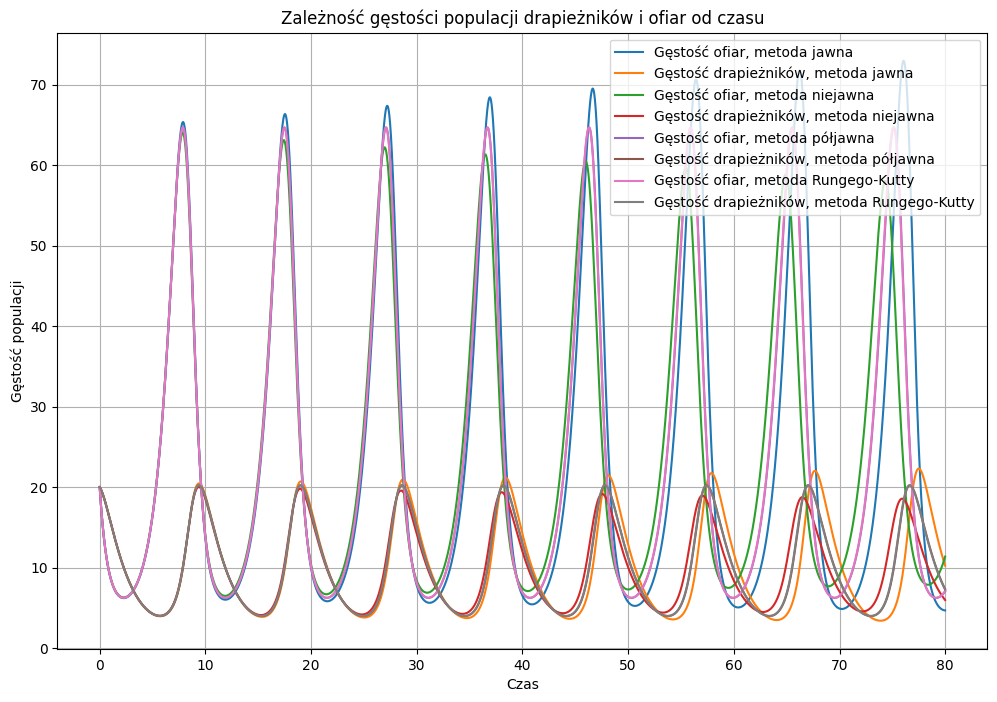

In [35]:
xs = np.arange(START, END, h)
plt.figure(figsize=(12, 8))
plt.plot(xs, explicit_x, label="Gęstość ofiar, metoda jawna")
plt.plot(xs, explicit_y, label="Gęstość drapieżników, metoda jawna")
plt.plot(xs, implicit_x, label="Gęstość ofiar, metoda niejawna")
plt.plot(xs, implicit_y, label="Gęstość drapieżników, metoda niejawna")
plt.plot(xs, semi_implicit_x, label="Gęstość ofiar, metoda półjawna")
plt.plot(xs, semi_implicit_y, label="Gęstość drapieżników, metoda półjawna")
plt.plot(xs, RK4_x, label="Gęstość ofiar, metoda Rungego-Kutty")
plt.plot(xs, RK4_y, label="Gęstość drapieżników, metoda Rungego-Kutty")
plt.legend()
plt.grid()
plt.xlabel("Czas")
plt.ylabel("Gęstość populacji")
plt.title("Zależność gęstości populacji drapieżników i ofiar od czasu")
plt.show()

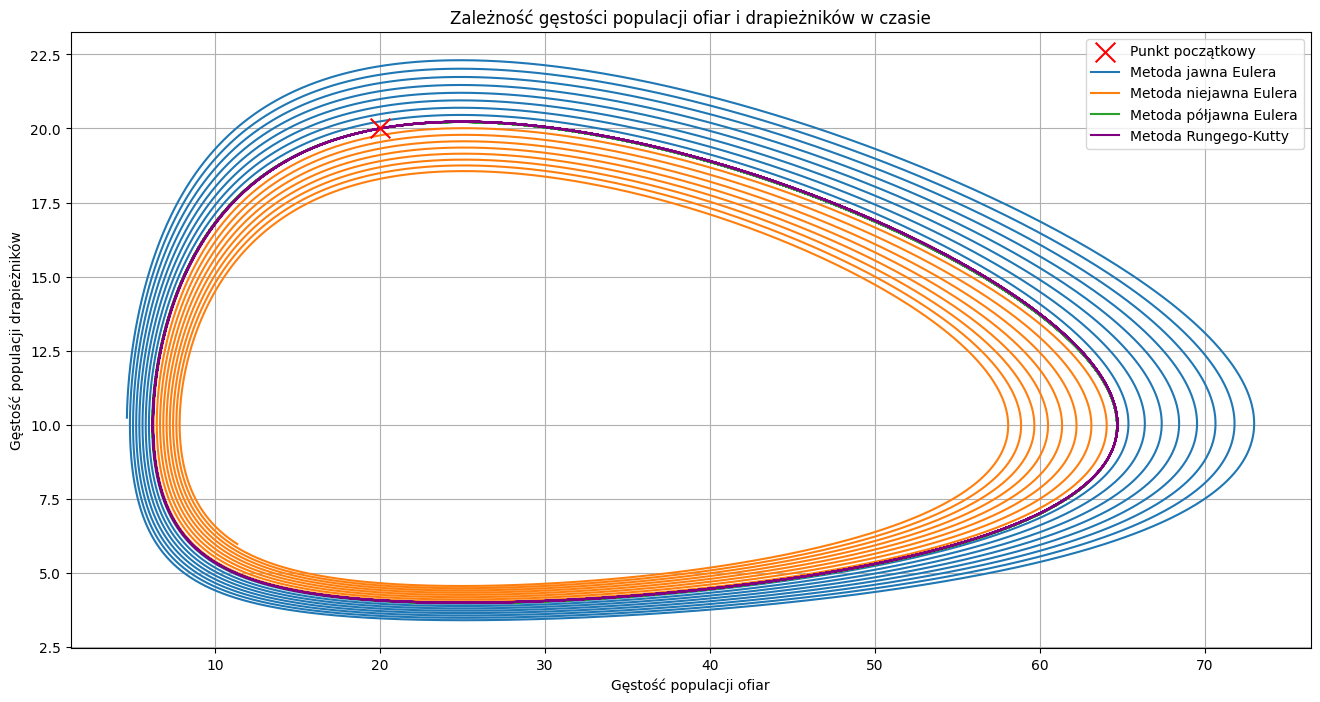

In [36]:
plt.figure(figsize=(16, 8))
plt.scatter(20, 20, marker="x", color="red", s=200, label="Punkt początkowy", zorder=5)
plt.plot(explicit_x, explicit_y, label="Metoda jawna Eulera")
plt.plot(implicit_x, implicit_y, label="Metoda niejawna Eulera")
plt.plot(semi_implicit_x, semi_implicit_y, label="Metoda półjawna Eulera")
plt.plot(RK4_x, RK4_y, label="Metoda Rungego-Kutty", color="purple")
plt.xlabel("Gęstość populacji ofiar")
plt.ylabel("Gęstość populacji drapieżników")
plt.title("Zależność gęstości populacji ofiar i drapieżników w czasie")
plt.legend()
plt.grid()
plt.show()

## Niezmiennik

$ H(x, y) = β_2 x + β_1 y - α_2 ln(x) - α_1 ln(y) $

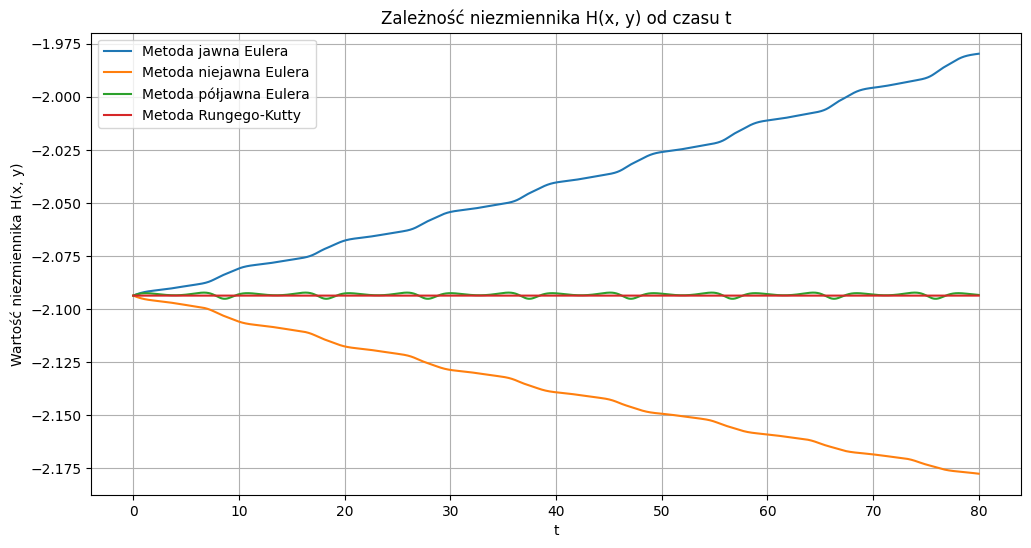

In [37]:
def H(x, y):
    return beta2 * x + beta1 * y - alpha2 * np.log(x) - alpha1 * np.log(y)

plt.figure(figsize=(12, 6))
plt.plot(xs, H(explicit_x, explicit_y), label="Metoda jawna Eulera")
plt.plot(xs, H(implicit_x, implicit_y), label="Metoda niejawna Eulera")
plt.plot(xs, H(semi_implicit_x, semi_implicit_y), label="Metoda półjawna Eulera")
plt.plot(xs, H(RK4_x, RK4_y), label="Metoda Rungego-Kutty")
plt.legend()
plt.xlabel("t")
plt.ylabel("Wartość niezmiennika H(x, y)")
plt.title("Zależność niezmiennika H(x, y) od czasu t")
plt.grid()
plt.show()

## Szacowanie prawdziwych współczynników metodą RSS

In [ ]:
# Wczytanie danych
data = np.loadtxt("LynxHare.txt")

years = data[:, 0]
lynx = data[:, 1]
hares = data[:, 2]

# ===== CHANGE THIS ======
h = 1

#print(years)
#print(lynx)
#print(hares)

In [41]:
def L1(lynx_real, lynx_predicted, hare_real, hare_predicted) -> np.double:
    return np.sum((lynx_predicted-lynx_real)**2) + np.sum((hare_predicted - hare_real)**2)

def L2(lynx_real, lynx_predicted, hare_real, hare_predicted) -> np.double:
    return -np.sum(lynx_real * np.log(lynx_predicted)) - np.sum(hare_real * np.log(hare_predicted)) + np.sum(lynx_predicted) + np.sum(hare_predicted)

def WL(params, lynx_real, hare_real, L) -> np.double:
    # [alpha1, alpha2, beta1, beta2]
    hare_p, lynx_p = \
    RK4(hare_real[0], lynx_real[0], len(hare_real), h, params[0], params[1], params[2], params[3])
    
    return L(lynx_real, lynx_p, hare_real, hare_p)



result1 = minimize(WL, [alpha1, alpha2, beta1, beta2], args=(lynx, hares, L1), method='Nelder-Mead')
#print(result1)
result2 = minimize(WL, [alpha1, alpha2, beta1, beta2], args=(lynx, hares, L2), method='Nelder-Mead')
#print(result2)

print(f"Wynik z pierwszą funkcją: alpha1={result1.x[0]}, alpha2={result1.x[1]}, beta1={result1.x[2]}, beta2={result1.x[3]}")
print(f"Wynik z drugą funkcją: alpha1={result2.x[0]}, alpha2={result2.x[1]}, beta1={result2.x[2]}, beta2={result2.x[3]}")


Wynik z pierwszą funkcją: alpha1=0.20939262148457538, alpha2=2.2933447308608144, beta1=0.005414100974864945, beta2=0.08437700327514573
Wynik z drugą funkcją: alpha1=0.13028868661250642, alpha2=3.715384863663302, beta1=0.0032927423435143268, beta2=0.1300170701902812


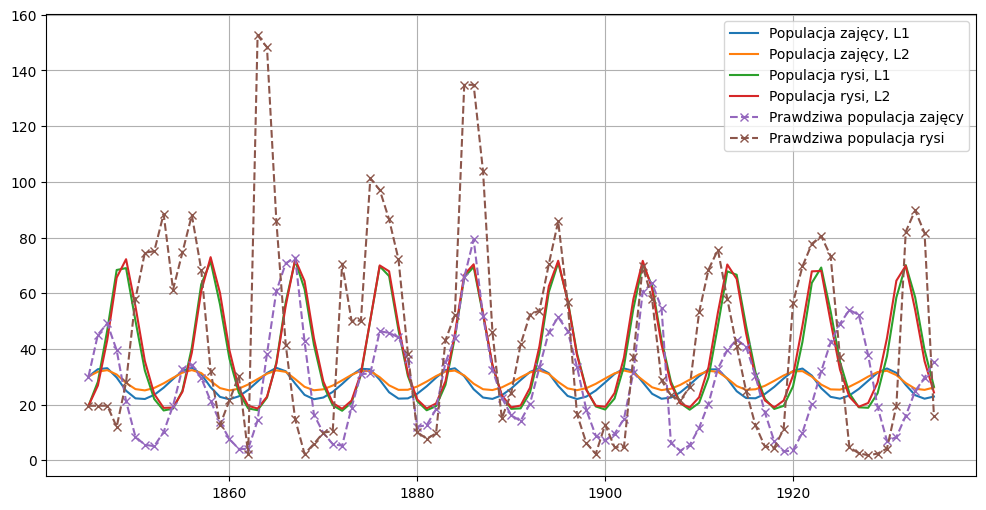

In [ ]:
#może jakiś wykres jak to wychodzi dla takich danych
y1_hares, y1_lynx = RK4(hares[0], lynx[0], len(hares), h, result1.x[0], result1.x[1], result1.x[2], result1.x[3])
y2_hares, y2_lynx = RK4(hares[0], lynx[0], len(hares), h, result2.x[0], result2.x[1], result2.x[2], result2.x[3])

plt.figure(figsize=(12, 6))
plt.plot(years, y1_hares, label="Populacja zajęcy, L1")
plt.plot(years, y2_hares, label="Populacja zajęcy, L2")
plt.plot(years, y1_lynx, label="Populacja rysi, L1")
plt.plot(years, y2_lynx, label="Populacja rysi, L2")
plt.plot(years, hares, label="Prawdziwa populacja zajęcy", marker="x", ls="--")
plt.plot(years, lynx, label="Prawdziwa populacja rysi", marker="x", ls="--")
plt.legend()
plt.grid()
plt.show()

# sprawdzić dla mniejszczego h ten ostatni wykres
# rozdzielić pierwszy wykres na ofiary i drapieżników osobno